In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$X=\mu_X+\sigma_A A$$

$$Y=\mu_Y+\sigma_A A+ \sigma_B B$$

where $\mu_X,\mu_Y,\sigma_A,$ and $\sigma_B$ are constants, and A and B are independent variables distributed according to normal distribution(mean=0 and standard deviation=1)

Q1.

Expectation values:

$E[A]=0$ the mean value of A & B are 0

$E[B]=0$


$E[X]=E[\mu_X+\sigma_A A]=E[\mu_X]+\sigma_AE[A]=\mu_X+0=\mu_X$



$E[Y]=E[\mu_Y+\sigma_A A+ \sigma_B B]=E[\mu_Y]+\sigma_AE[A]+\sigma_BE[B]=\mu_Y+0+0=\mu_Y$



Variance:

$V[A]=1^2=1$ the standard deviation of A & B are 1

$V[B]=1^2=1$

$V[X]=V[\mu_X+\sigma_A A]=V[\mu_X]+ V[\sigma_A A]=0+E[(\sigma_A A)^2]-E[\sigma_A A]^2=\sigma_A^2(E[A^2]-E[A]^2)=\sigma_A^2V[A]=\sigma_A^2$

similarly,

$V[Y]=V[\mu_Y+\sigma_A A+\sigma_B B]=V[\mu_Y]+ V[\sigma_A A]+V[\sigma_B B]=0+\sigma_A^2V[A]+\sigma_B^2V[B]=\sigma_A^2+\sigma_B^2$

Covariance:

$V_{XY}=E[XY]-E[X]E[Y]$



$\begin{aligned}E[XY]&=E[(\mu_X+\sigma_A A)(\mu_Y+\sigma_A A+ \sigma_B B)]\\&= E[\mu_X\mu_Y+\mu_X\sigma_A A+\mu_X\sigma_B B+\mu_Y\sigma_AA +(\sigma_A A)^2+\sigma_A \sigma_B A B]\\&=E[\mu_X\mu_Y]+(\mu_X+\mu_Y)\sigma_AE[A]+\mu_X\sigma_BE[B]+\sigma_A^2E[A^2]+\sigma_A \sigma_B E[A B]\\&=\mu_X\mu_Y+\sigma_A^2E[A^2]+\sigma_A \sigma_B E[A]E[B]\end{aligned}$

$E[AB]=E[A]E[B]$ because A and B are independent.



$1=V[A]=E[A^2]-E[A]^2=E[A^2]-0^2=E[A^2]$

$\Longrightarrow E[A^2]=1$

Then,
$E[XY]=\mu_X\mu_Y+\sigma_A^2$

$V_{XY}=E[XY]-E[X]E[Y]=\mu_X\mu_Y+\sigma_A^2-\mu_X\mu_Y=\sigma_A^2$

Correlation Coefficient:

$\rho_{XY}=\frac{V_{XY}}{\sqrt{V[X]V[Y]}}=\frac{\sigma_A^2}{\sqrt{\sigma_A^2(\sigma_A^2+\sigma_B^2)}}=\frac{\sigma_A}{\sqrt{\sigma_A^2+\sigma_B^2}}$

Q2.

In [2]:
import random

In [3]:
def getSample(n):
    muA=0
    muB=0
    
    sigmaA=1
    sigmaB=1
    
    X=[]
    Y=[]
    for i in range(n):
        A=random.gauss(muA, sigmaA)
        B=random.gauss(muB, sigmaB)
        X.append(muX+sA*A)
        Y.append(muY+sA*A+sB*B)
    return X,Y

Q3.

In [4]:
muX=5
muY=4
sA=3
sB=2

In [5]:
a=getSample(20)

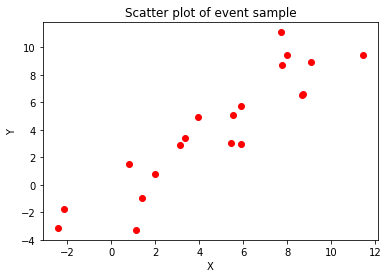

In [6]:
x=array(a[0])
y=array(a[1])

plot(x,y,'ro')
xlabel('X')
ylabel('Y')
title('Scatter plot of event sample')
show()

We can see that there is a weak linear relationship between Y and X.

In [7]:
print('the mean value of X is : %s and expectation: 5'%round(mean(x),3))
print('the mean value of Y is : %s and expectation: 4'%round(mean(y),3))

print('the variance of X is: %s and expectation: 9'%round(var(x),3))
print('the variance of Y is: %s and expectation: 13'%round(var(y),3))

Vxy=cov(x,y)[0][1]
r=corrcoef(x,y)[0][1]

print('the covariance of X and Y is: %s and expectation: 9'%round((Vxy),3))
print('the correlation coefficient of X and Y is %s, and ρ= %s'%(round(r,3),round(sA/sqrt(sA**2+sB**2),3)))

the mean value of X is : 4.764 and expectation: 5
the mean value of Y is : 4.089 and expectation: 4
the variance of X is: 13.957 and expectation: 9
the variance of Y is: 17.787 and expectation: 13
the covariance of X and Y is: 15.074 and expectation: 9
the correlation coefficient of X and Y is 0.909, and ρ= 0.832


Q4.

In [8]:
NN=1000
def getr(m):
    M=[]
    for i in range(NN):
        b=getSample(m)
        x=b[0]
        y=b[1]
        r=corrcoef(x,y)[0][1]
        M.append(r)
    return M

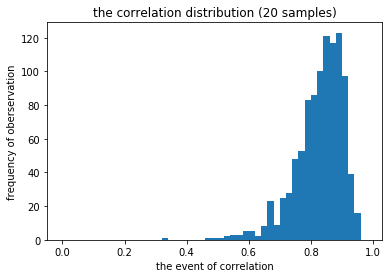

the mean value of r is: 0.827
the standard deviation of r is: 0.078


In [9]:
abin = arange(0, 1, 0.02)
N=20
R=getr(N)
hist(R,bins=abin)
xlabel('the event of correlation')
ylabel('frequency of oberservation')
title('the correlation distribution (%s samples)'%N)
show()
print('the mean value of r is:',round(mean(R),3))
print('the standard deviation of r is:',round(std(R),3))

Q5.

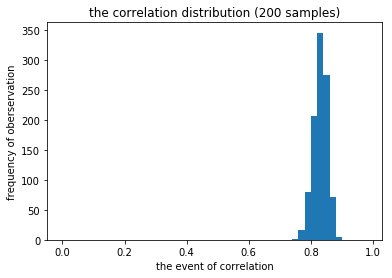

the mean value of r is: 0.83
the standard deviation of r is: 0.022


In [10]:
N=200
R=getr(N)
hist(R,bins=abin)
xlabel('the event of correlation')
ylabel('frequency of oberservation')
title('the correlation distribution (%s samples)'%N)
show()
print('the mean value of r is:',round(mean(R),3))
print('the standard deviation of r is:',round(std(R),3))

Comapred with 20 samples, the r of 200 samples is less spread out, and the mean value is more closed to the expectation $\rho$.

Q6.

$z=$tanh$^{-1}(r)$

$E[Z]=$tanh$^{-1}(\rho)+\frac{\rho}{2(n-1)}$

$V[Z]=\frac{1}{n-3}$

In [11]:
def G(x):
    return 1/sqrt(2*pi*sigz**2)*e**(-(x-Ez)**2/(2*sigz**2))

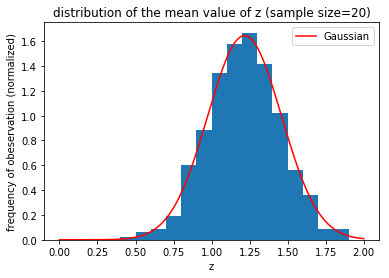

the mean value of z is:1.215 and the expectation is:1.217
the standard deviation of z is:0.246 and the expectation is:0.243


In [12]:
num=20
R=getr(num)

z=arctanh(R)
p=sA/sqrt(sA**2+sB**2)                #calculate ρ
Ez=arctanh(p)+p/(2*(num-1))
sigz=sqrt(1/(num-3))

xx=linspace(0,2,1000)
plot(xx,G(xx),'r-',label='Gaussian')

bbin=arange(0,2,0.1)
hist(z,bins=bbin,density=1)
xlabel('z')
ylabel('frequency of obeservation (normalized)')
title('distribution of the mean value of z (sample size=%s)'%num)
legend(loc='best')
show()
print('the mean value of z is:%s and the expectation is:%s'%(round(mean(z),3),round((Ez),3)))
print('the standard deviation of z is:%s and the expectation is:%s'%(round(std(z),3),round((sigz),3)))

It can be seen that there is a weak gaussian shape of 20 smaples.